In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from scipy import misc
import cv2

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 20.0) # set default size of plots

## Read input data

In [2]:
%ls ../input

sample_submission.csv       train_photo_to_biz_ids.csv
test_photo_to_biz.csv       train_photos/
train.csv


In [3]:
train_photo_to_biz_ids = pd.read_csv('../input/train_photo_to_biz_ids.csv')

In [8]:
biz_id_to_photos = {k: g["photo_id"].tolist() for k,g in train_photo_to_biz_ids.groupby("business_id")}

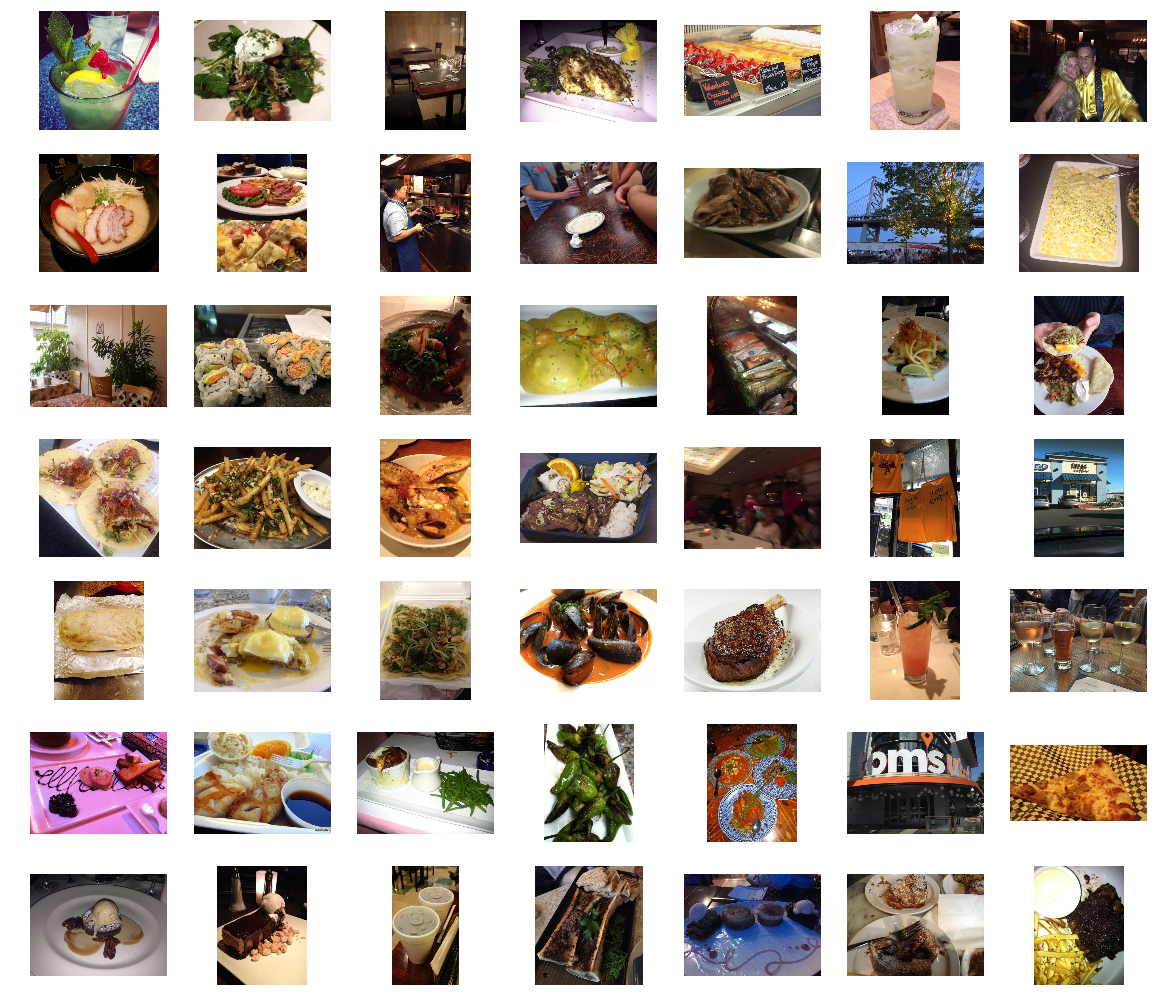

In [62]:
num_samples = 49
for idx, img_id in enumerate(train_photo_to_biz_ids.photo_id[np.random.randint(0, len(train_photo_to_biz_ids), num_samples)]):
    img = misc.imread(os.path.join('../input','train_photos', str(img_id)+".jpg"))
    plt.subplot(np.sqrt(num_samples)+1, np.sqrt(num_samples), idx+1)
    plt.axis('off')
    plt.imshow(img)

In [9]:
restaurant_attributes = {0: "good_for_lunch",
1: "good_for_dinner",
2: "takes_reservations",
3: "outdoor_seating",
4: "restaurant_is_expensive",
5: "has_alcohol",
6: "has_table_service",
7: "ambience_is_classy",
8: "good_for_kids",}

biz_id_to_attribs = pd.read_csv('../input/train.csv')
for attrib_key,attrib in restaurant_attributes.iteritems():
    biz_id_to_attribs[attrib] = biz_id_to_attribs['labels'].str.contains(str(attrib_key))

In [10]:
biz_id_to_attribs.head()

business_id         labels good_for_lunch good_for_dinner  \
0         1000  1 2 3 4 5 6 7          False            True   
1         1001        0 1 6 8           True            True   
2          100    1 2 4 5 6 7          False            True   
3         1006      1 2 4 5 6          False            True   
4         1010          0 6 8           True           False   

  takes_reservations outdoor_seating restaurant_is_expensive has_alcohol  \
0               True            True                    True        True   
1              False           False                   False       False   
2               True           False                    True        True   
3               True           False                    True        True   
4              False           False                   False       False   

  has_table_service ambience_is_classy good_for_kids  
0              True               True         False  
1              True              False          True  
2              True               True         False  
3              True              False         False  
4              True              False          True

## Pre-process images

In [62]:
def readImage(img_id, vgg_compatible_input=True, preprocess=False):
    img = misc.imread(os.path.join('../input','train_photos', str(img_id)+".jpg"))
    
    if preprocess:
        img = cv2.resize(img, (224, 224)).astype(np.float32)
        img[:,:,0] -= 103.939
        img[:,:,1] -= 116.779
        img[:,:,2] -= 123.68
        
    if vgg_compatible_input:
        img = img.transpose((2,0,1))
        img = np.expand_dims(img, axis=0)
        
    return img

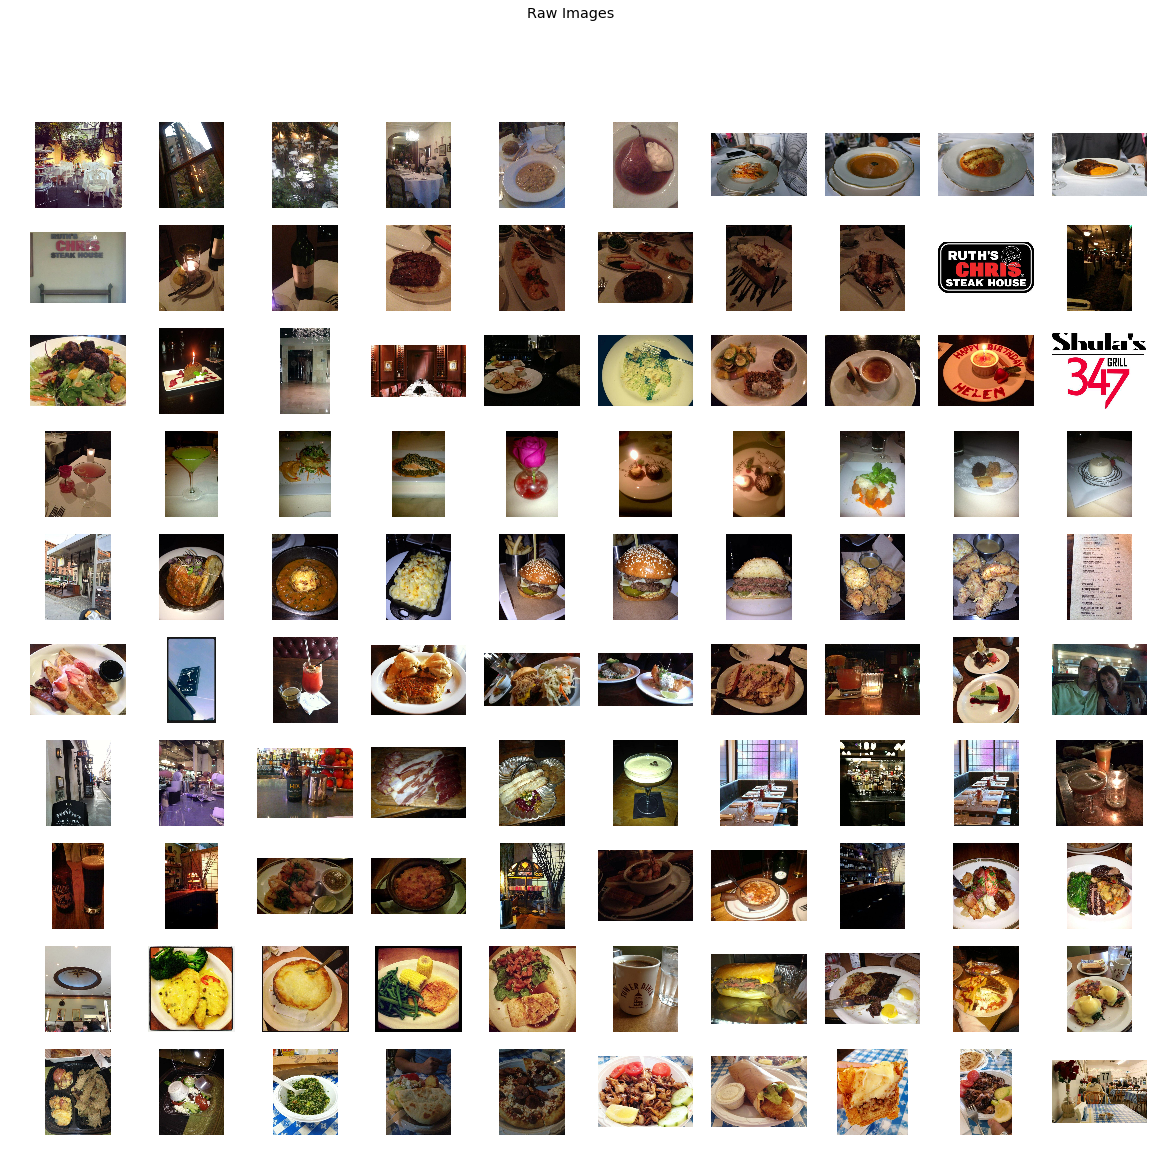

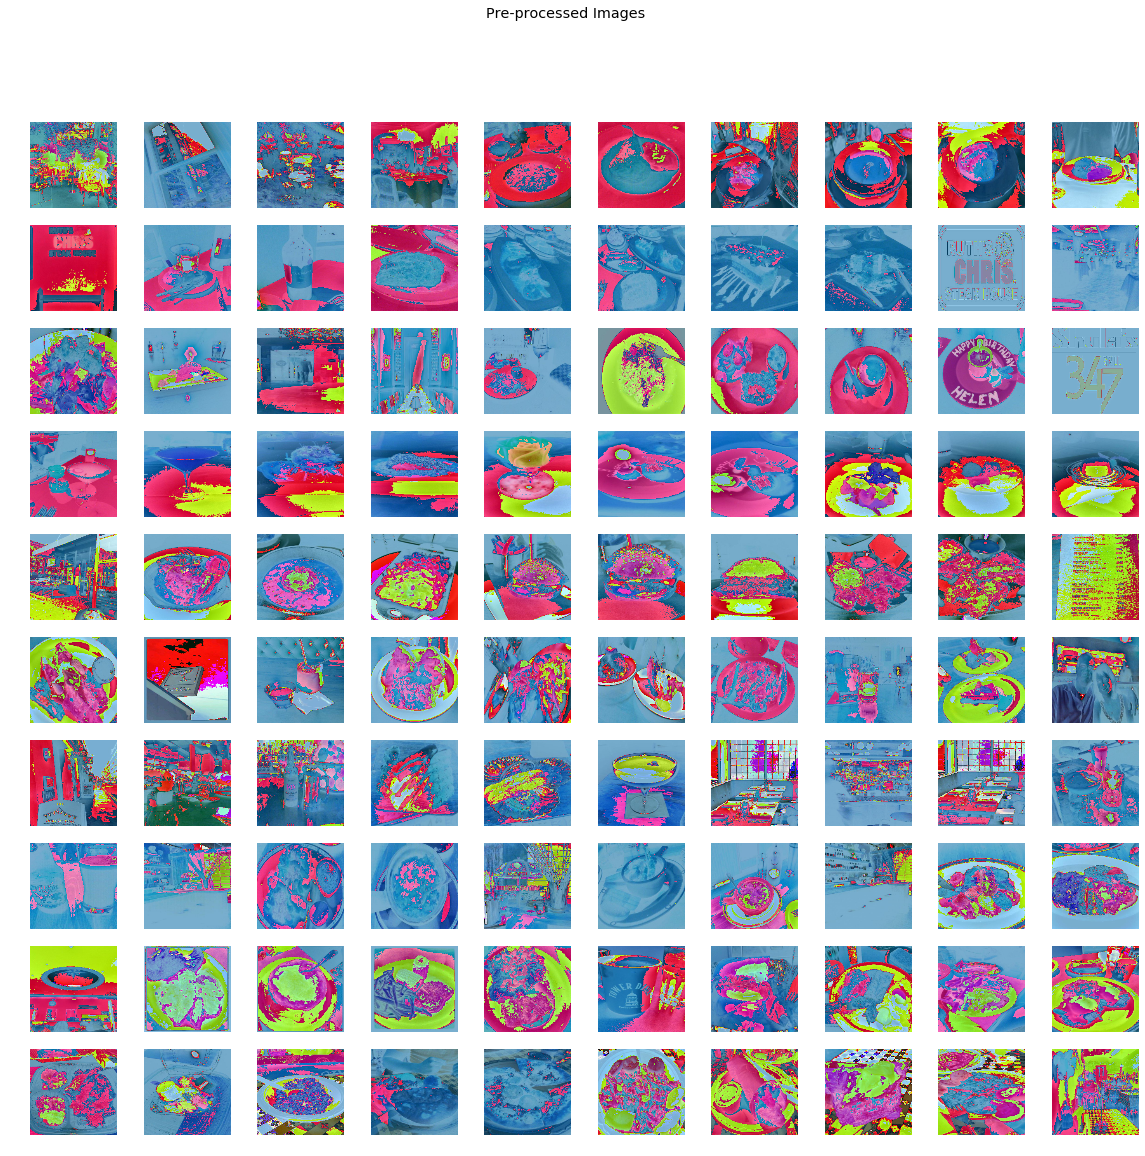

In [67]:
alcoholic_places = biz_id_to_attribs[biz_id_to_attribs['has_alcohol'] == True]['business_id']
fig = plt.figure(1)
st = fig.suptitle("Raw Images", fontsize="x-large")
for i, biz_id in enumerate(alcoholic_places.to_dict().values()[:10]):
    for j in range(min(len(biz_id_to_photos[biz_id]),10)):
        plt.subplot(10+1,10,i*10+j+1)
        plt.axis("off")
        plt.imshow(readImage(biz_id_to_photos[biz_id][j], vgg_compatible_input=False, preprocess=False))
fig = plt.figure(2)
st = fig.suptitle("Pre-processed Images", fontsize="x-large")
for i, biz_id in enumerate(alcoholic_places.to_dict().values()[:10]):
    for j in range(min(len(biz_id_to_photos[biz_id]),10)):
        plt.subplot(10+1,10,i*10+j+1)
        plt.axis("off")
        plt.imshow(readImage(biz_id_to_photos[biz_id][j], vgg_compatible_input=True, preprocess=True)[0].transpose(1,2,0))